# 1.1 grafico torta 

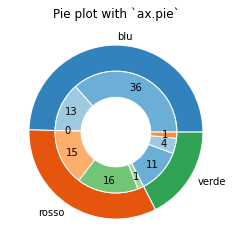

In [40]:
# codice per grafico nested pie
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

labels_esterno = 'blu', 'rosso', 'verde'



size = 0.3
#valore esterno = somma delle liste interne es 90 + 32 + 0 che è in % rispetto alle somme delle altre liste
# e i valori delle singole liste sono in % alla somma di tutti i valori di tutte le liste es il valore 90 è 36 % del totale
#al posto dello 0 avrò una label vuota, perchè liste devono essere della stessa len e le labels devono essere di numero uguale a tutti i valori
vals = np.array([[90, 32, 0], [37, 40,4], [29, 10,4]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


ax.pie(vals.sum(axis=1), labels = labels_esterno, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(),  radius=1-size, autopct='%d',pctdistance = 0.8, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))




ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np  

In [63]:
laureati_milano='80_laureati_milano.csv'
with open(laureati_milano,'rt')as f:
    data = csv.reader(f, delimiter = ';')
    intresting=[row for idx, row in enumerate(data) if idx in [40, 42, 43, 46,47,49]]#solo le rows interessanti
    
    for row in intresting:
        print(row[0])
        #per printare il dato allegato se c'è lo stampo altrimenti se non c'è genero eccezione che evito usando continue
        try:
            print(row[1].replace(",", "."))
        except:
            continue

Liceo classico
3.8
Liceo scientifico
47.5
Liceo delle scienze umane
1.3
Tecnico economico
11.3
Tecnico tecnologico
35.0
Titolo estero
1.3


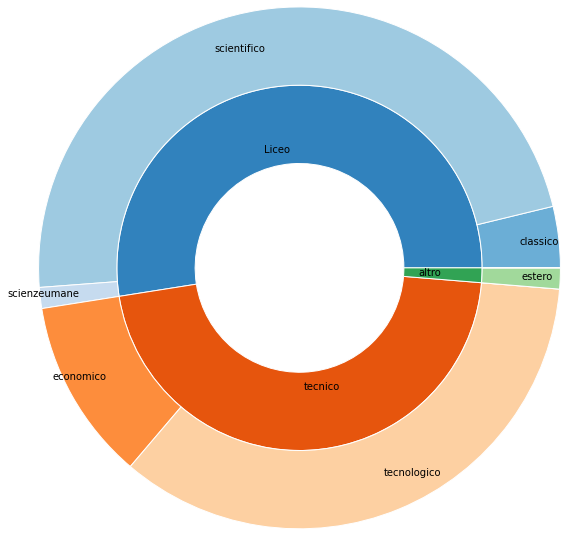

In [88]:
# GRAFICO TORTA NESTED SU precedenti studi
# questo nested è invertito, di solito gli spicchi dei sottoinsiemi stanno dentro, non fuori, se non piace cambiare !!
fig, ax = plt.subplots()

size = 0.3

vals = np.array([[float(intresting[0][1].replace(",",".")), float(intresting[1][1].replace(",",".")), float(intresting[2][1].replace(",","."))], [float(intresting[3][1].replace(",",".")), float(intresting[4][1].replace(",",".")), 0.], [float(intresting[5][1].replace(",",".")), 0., 0.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
#inner_colors = 
inner_colors = cmap([1,2,3,5,7,9,10,8,9,10,11,12])

ax.pie(vals.sum(axis=1), radius=3-0.9, colors=outer_colors,
       wedgeprops=dict(width=0.9, edgecolor='w'),labels=["Liceo", "tecnico", "altro"],
       pctdistance=1.1, labeldistance=0.65)

ax.pie(vals.flatten(), radius=3, colors=inner_colors,
       wedgeprops=dict(width=0.9, edgecolor='w'),labels=["classico","scientifico","scienzeumane","economico","tecnologico","", "estero" , "", ""],
       pctdistance=1.1, labeldistance=0.85)

ax.set(aspect="equal", title='')
plt.show()

# istogramma


In [23]:
laureati_milano='80_laureati_milano.csv'
with open(laureati_milano,'rt')as f:
    data = csv.reader(f, delimiter = ';')
    intrestingHist=[row for idx, row in enumerate(data) if idx in range(194, 203)]#solo le rows interessanti
    
    for row in intrestingHist:
        print(row[0])
        #per printare il dato allegato se c'è lo stampo altrimenti se non c'è genero eccezione che evito usando continue
        try:
            print(row[1])
        except:
            continue

Word processor
70,9
Fogli elettronici
57,0
Strumenti di presentazione
54,4
Sistemi operativi
87,3
Linguaggi di programmazione
94,9
Data base
73,4
Realizzazione siti web
69,6
Reti di trasmissione dati
62,0
Disegno e progettazione assistita
2,5


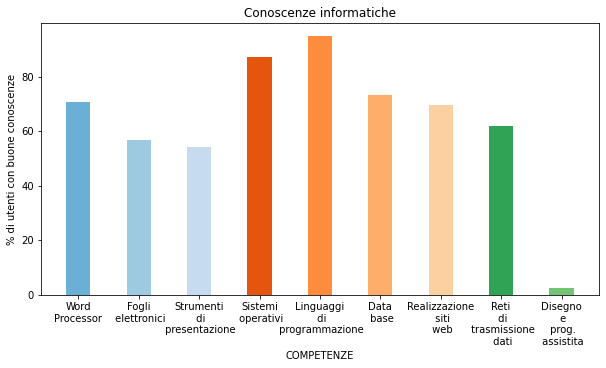

In [116]:
#funzione: ISTOGRAMMA su conoscenze acquisite post-laurea
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = { 'Word\nProcessor':float(intrestingHist[0][1].replace(",",".")), 'Fogli\n elettronici':float(intrestingHist[1][1].replace(",",".")), 'Strumenti\n di\n presentazione':float(intrestingHist[2][1].replace(",",".")),
        'Sistemi\n operativi':float(intrestingHist[3][1].replace(",",".")), 'Linguaggi\n di\n programmazione':float(intrestingHist[4][1].replace(",",".")),
        'Data\n base': float(intrestingHist[5][1].replace(",",".")), 'Realizzazione\n siti\n web':float(intrestingHist[6][1].replace(",",".")),
         'Reti\n di\n trasmissione\n dati':float(intrestingHist[7][1].replace(",",".")), 'Disegno\n e\n prog.\n assistita':float(intrestingHist[8][1].replace(",","."))}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
cmap = plt.get_cmap("tab20c")
plt.bar(courses, values, color =cmap([1,2,3,4,5,6,7,8,9]),
        width = 0.4)
 
plt.xlabel("COMPETENZE")
plt.ylabel("% di utenti con buone conoscenze")
plt.title("Conoscenze informatiche")
plt.show()

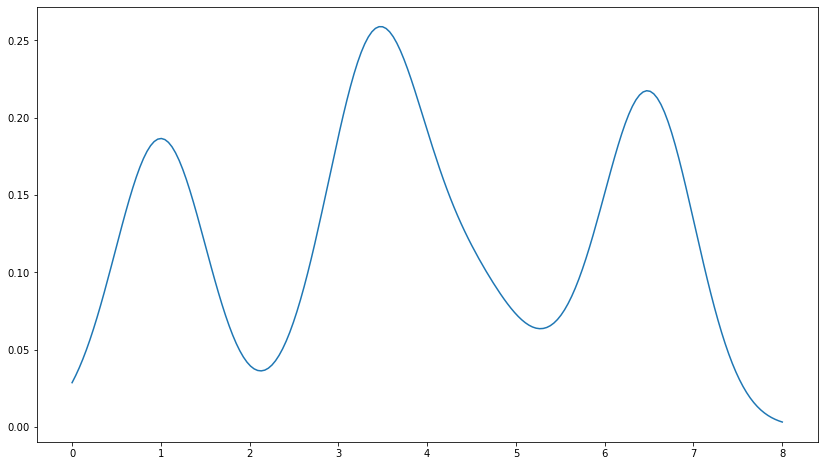

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Build dummy data
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 8, 200)

# Set the figure size
plt.figure(figsize=(14, 8))

# Make the chart
# We're actually building a line chart where x values are set all along the axis and y value are
# the corresponding values from the density function
plt.plot(xs,density(xs))
plt.show()

15.2
84.8


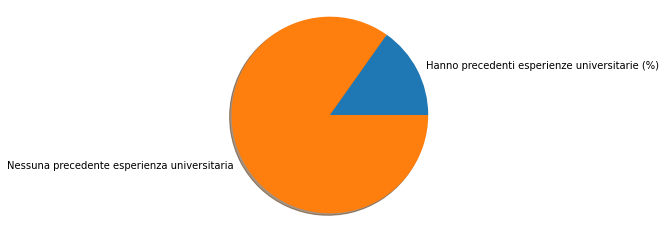

In [15]:
# torta: Precedenti studi universitari

import csv

#prelevare dati da csv
laureati_milano='80_laureati_milano.csv'
with open(laureati_milano,'rt')as f:
    data = csv.reader(f, delimiter = ';')
    intrestingHist=[row for idx, row in enumerate(data) if idx in [61,64] ]


labels = [intrestingHist[0][0], intrestingHist[1][0]]
sizes = np.array([float(intrestingHist[0][1].replace(",",".")), float(intrestingHist[1][1].replace(",",".")) ])

print(float(intrestingHist[0][1].replace(",","."))) #SISTEMARE, ha fatto le percentuali su 100 casi, non su 80 come sono i casi
print(float(intrestingHist[1][1].replace(",",".")))



fig1, ax1 = plt.subplots()
ax1.pie(x = sizes, labels=labels,
        shadow=True)
ax1.axis('equal') 

plt.show()

2.5
12.7


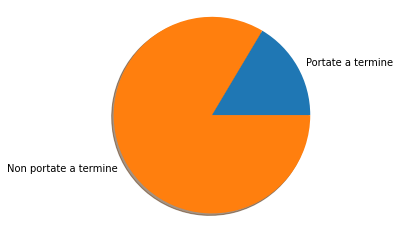

In [17]:
# torta: Precedenti studi universitari, campo "hanno precedenti esperienze" -> portate a terimine, non portate a termine

import csv

#prelevare dati da csv
laureati_milano='80_laureati_milano.csv'
with open(laureati_milano,'rt')as f:
    data = csv.reader(f, delimiter = ';')
    intrestingHist=[row for idx, row in enumerate(data) if idx in [62,63] ]

# FARE COLORI !!! + le slice mi sembrano di dimensioni sbagliate


labels = [intrestingHist[0][0], intrestingHist[1][0]]
sizes = np.array([float(intrestingHist[0][1].replace(",",".")), float(intrestingHist[1][1].replace(",",".")) ])

print(float(intrestingHist[0][1].replace(",",".")))
print(float(intrestingHist[1][1].replace(",",".")))



fig1, ax1 = plt.subplots()
ax1.pie(x = sizes, labels=labels,
        shadow=True)
ax1.axis('equal') 

plt.show()

A tutele crescenti 
84,8
A tempo determinato
19,0
Stage
7,6
Apprendistato
11,4
Somministrazione di lavoro (ex interinale)
6,3
Autonomo/in conto proprio
25,3


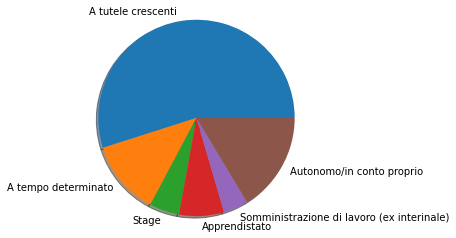

In [27]:
# torta: tipologia di contratti 

import csv

#prelevare dati da csv
laureati_milano='80_laureati_milano.csv'
with open(laureati_milano,'rt')as f:
    data = csv.reader(f, delimiter = ';')
    intrestingHist=[row for idx, row in enumerate(data) if idx in range(255,261) ]
    
    # per controllare se i dati estratti sono giusti ---------------------------------
    for row in intrestingHist:
        print(row[0])
        #per printare il dato allegato se c'è lo stampo altrimenti se non c'è genero eccezione che evito usando continue
        try:
            print(row[1])
        except:
            continue



labels = [intrestingHist[0][0], intrestingHist[1][0], intrestingHist[2][0], intrestingHist[3][0],intrestingHist[4][0], intrestingHist[5][0] ]
sizes = np.array([ float(intrestingHist[0][1].replace(",",".")), float(intrestingHist[1][1].replace(",",".")), float(intrestingHist[2][1].replace(",",".")), float(intrestingHist[3][1].replace(",",".")), float(intrestingHist[4][1].replace(",",".")), float(intrestingHist[5][1].replace(",",".")) ])

fig1, ax1 = plt.subplots()
ax1.pie(x = sizes, labels=labels,
        shadow=True)
ax1.axis('equal') 

plt.show()